In [122]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

In [123]:
data=pd.read_csv("diabetes.csv",sep=",")
df=data.copy()

In [124]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [126]:
df.describe(percentiles=np.arange(0.1,1.0,0.1)).T

,count,mean,std,min,10%,20%,30%,40%,50%,60%,70%,80%,90%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.0000,1.000,2.0000,3.0000,4.0000,5.0000,7.000,9.0000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,95.0000,102.000,109.0000,117.0000,125.0000,134.0000,147.000,167.0000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,60.0000,64.000,68.0000,72.0000,74.0000,78.0000,82.000,88.0000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.0000,8.200,18.0000,23.0000,27.0000,31.0000,35.000,40.0000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.0000,0.000,0.0000,30.5000,72.2000,106.0000,150.000,210.0000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,25.9000,28.200,30.1000,32.0000,33.7000,35.4900,37.800,41.5000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.2194,0.259,0.3028,0.3725,0.4542,0.5637,0.687,0.8786,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,23.0000,25.000,27.0000,29.0000,33.0000,38.0000,42.600,51.0000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.0000,0.000,0.0000,0.0000,0.0000,1.0000,1.000,1.0000,1.00


In [127]:
x=pd.cut(df.Insulin,bins=[-1,40,80,120,200,850])
x.unique()

[(-1, 40], (80, 120], (120, 200], (200, 850], (40, 80]]
Categories (5, interval[int64]): [(-1, 40] < (40, 80] < (80, 120] < (120, 200] < (200, 850]]

In [128]:
x.value_counts()

(-1, 40]      393
(120, 200]    117
(80, 120]      87
(40, 80]       86
(200, 850]     85
Name: Insulin, dtype: int64

In [129]:
x.head()

0      (-1, 40]
1      (-1, 40]
2      (-1, 40]
3     (80, 120]
4    (120, 200]
Name: Insulin, dtype: category
Categories (5, interval[int64]): [(-1, 40] < (40, 80] < (80, 120] < (120, 200] < (200, 850]]

In [130]:
df.iloc[x[x==x.iloc[0]].index]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


In [131]:
df.iloc[x[x==x.iloc[3]].index]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
6,3,78,50,32,88,31.0,0.248,26,1
18,1,103,30,38,83,43.3,0.183,33,0
19,1,115,70,30,96,34.6,0.529,32,1
25,10,125,70,26,115,31.1,0.205,41,1
...,...,...,...,...,...,...,...,...,...
741,3,102,44,20,94,30.8,0.400,26,0
742,1,109,58,18,116,28.5,0.219,22,0
745,12,100,84,33,105,30.0,0.488,46,0
755,1,128,88,39,110,36.5,1.057,37,1


In [132]:
df.iloc[x[x==x.iloc[4]].index]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137,40,35,168,43.1,2.288,33,1
14,5,166,72,19,175,25.8,0.587,51,1
24,11,143,94,33,146,36.6,0.254,51,1
27,1,97,66,15,140,23.2,0.487,22,0
35,4,103,60,33,192,24.0,0.966,33,0
...,...,...,...,...,...,...,...,...,...
738,2,99,60,17,160,36.6,0.453,21,0
740,11,120,80,37,150,42.3,0.785,48,1
744,13,153,88,37,140,40.6,1.174,39,0
748,3,187,70,22,200,36.4,0.408,36,1


In [133]:
df2=data.copy()

In [134]:
df2.loc[df[df2.Glucose==0].index,"Glucose"]=np.nan
df2.loc[df[df2.BloodPressure==0].index,'BloodPressure']=np.nan
df2.loc[df[df2.SkinThickness==0].index,'SkinThickness']=np.nan
df2.loc[df[df2.Insulin==0].index,"Insulin"]=np.nan
df2.loc[df[df2.BMI==0].index,"BMI"]=np.nan

In [135]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


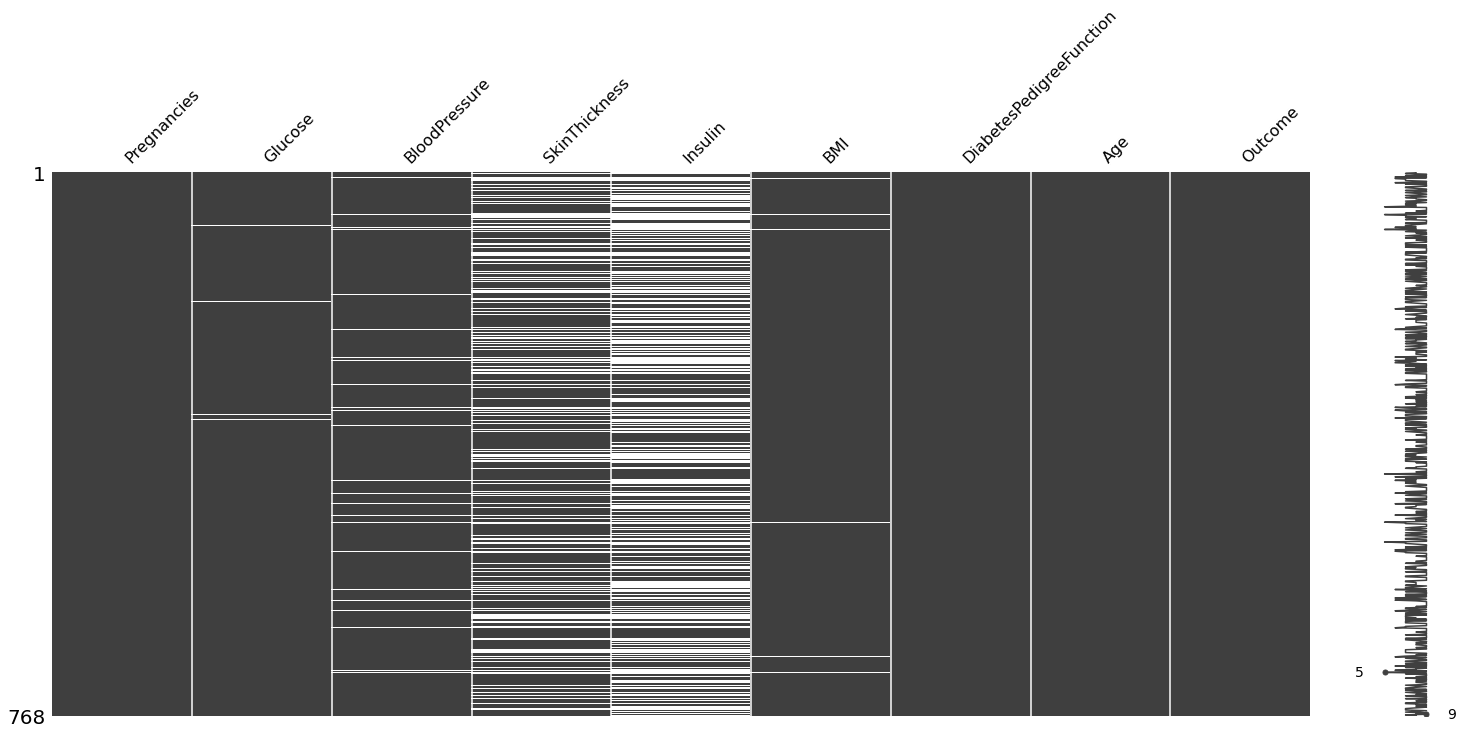

In [136]:
import missingno as msno
msno.matrix(df2);

In [137]:
df[df.Insulin==0].__len__()

374

In [138]:
df[df.SkinThickness==0].__len__()

227

In [139]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

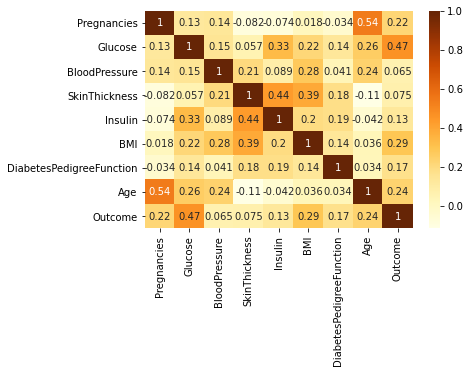

In [140]:
sbn.heatmap(df.corr(),annot=True,cmap="YlOrBr")

In [141]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Verilerin Dağılımının gösterilmesi

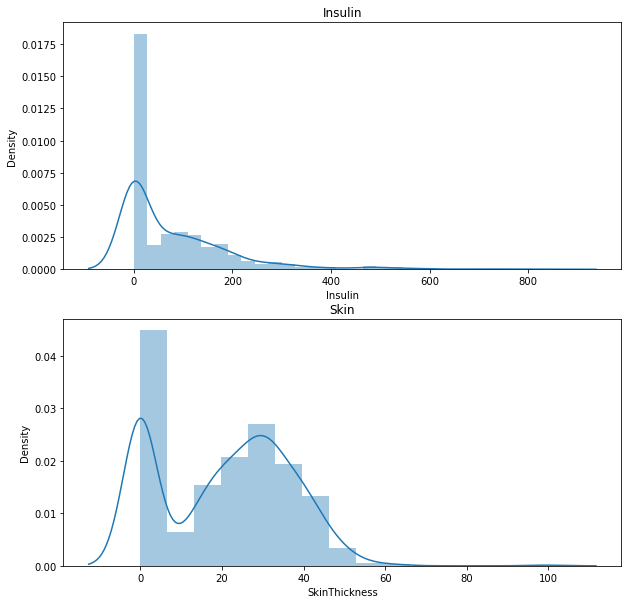

In [142]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sbn.distplot(df.Insulin);
plt.title("Insulin")
plt.subplot(2,1,2)
plt.title("Skin")
sbn.distplot((df.SkinThickness));

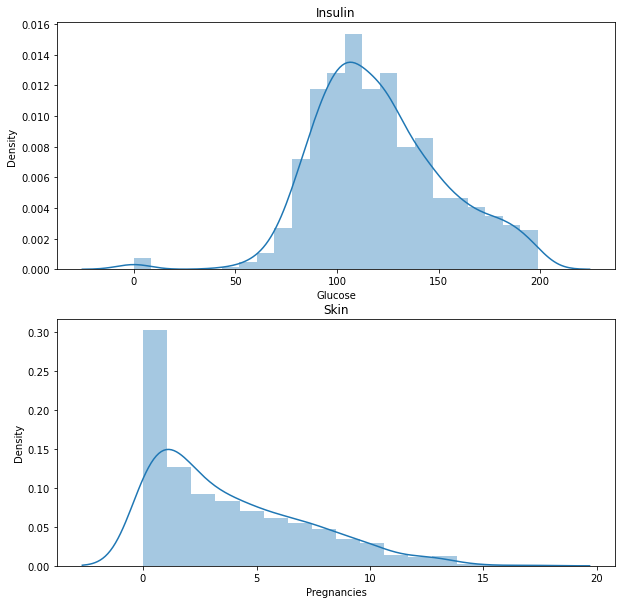

In [143]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sbn.distplot(df.Glucose);
plt.title("Insulin")
plt.subplot(2,1,2)
plt.title("Skin")
sbn.distplot((df.Pregnancies));

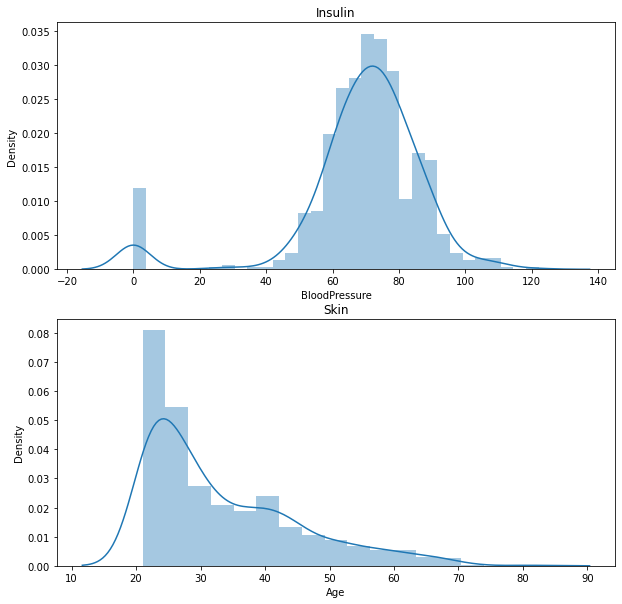

In [144]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sbn.distplot(df.BloodPressure);
plt.title("Insulin")
plt.subplot(2,1,2)
plt.title("Skin")
sbn.distplot((df.Age));

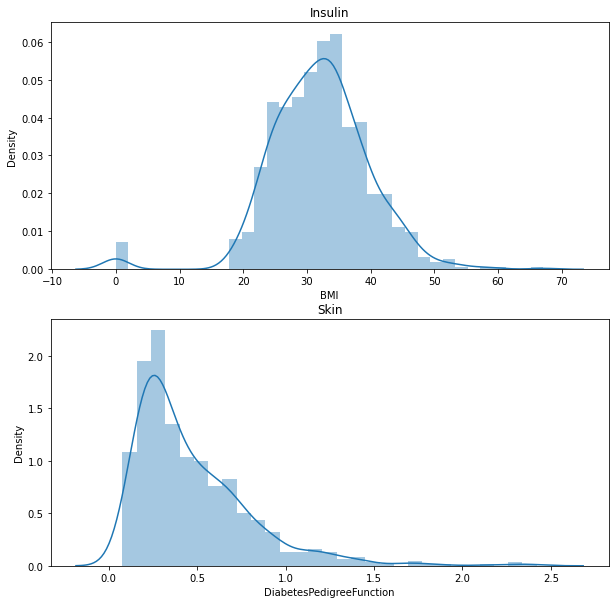

In [145]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
sbn.distplot(df.BMI);
plt.title("Insulin")
plt.subplot(2,1,2)
plt.title("Skin")
sbn.distplot((df.DiabetesPedigreeFunction));

In [146]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


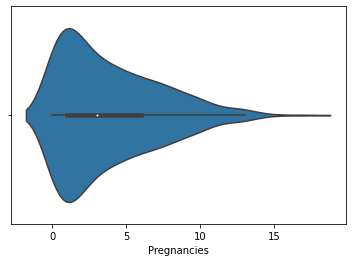

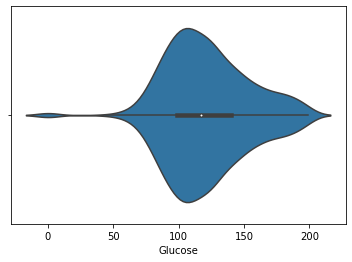

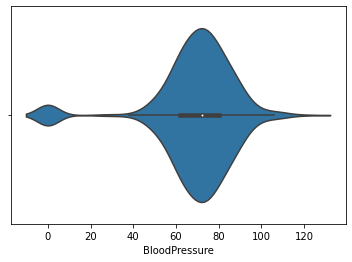

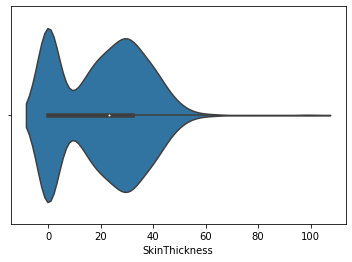

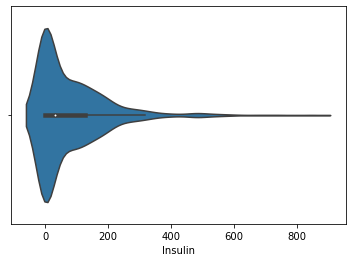

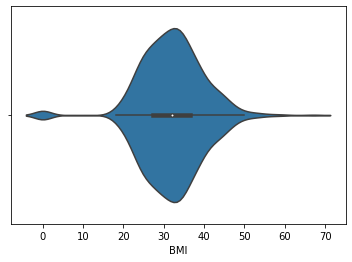

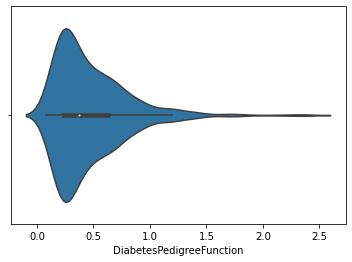

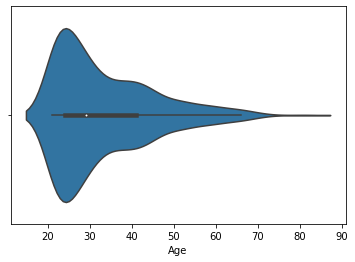

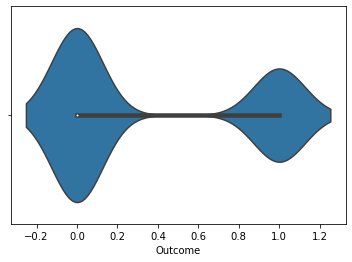

In [147]:
from warnings import filterwarnings
filterwarnings('ignore')
for i in df.columns:
    sbn.violinplot(df[i])
    plt.show()

Hiçbir değişiklik yapmadan model oluşturma

In [148]:
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,GridSearchCV
from sklearn.cross_decomposition import PLSSVD,PLSRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier,RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier,XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [149]:
models=[LinearRegression(),PLSRegression(),KNeighborsClassifier(),SVC(),MLPClassifier(),DecisionTreeClassifier(),ExtraTreeClassifier(),AdaBoostClassifier(),
        BaggingClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBRFClassifier(),XGBClassifier(),LGBMClassifier(),GaussianNB()]
accuracies=list()
cv_accuracies=list()

In [150]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [151]:
x=df.drop(columns="Outcome")
y=df[["Outcome"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)

In [152]:
def threshold_05(x):
    if(x>0.5):
        return 1
    else:
        return 0

In [153]:
for i in models:
    model=i.fit(x_train,y_train)
    x=pd.DataFrame(model.predict(x_test))[0].apply(threshold_05)
    accuracies.append(accuracy_score(y_test,x))
    cv_accuracies.append(cross_val_score(model,x_test,y_test,cv=10).mean())

[08:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [33]:
?cross_val_score

In [154]:
for model,accuracy,cv in zip(models,accuracies,cv_accuracies):
    print(str(model)+" "+str(accuracy)+" "+str(cv))

LinearRegression() 0.7316017316017316 0.23674672683294434
PLSRegression() 0.7402597402597403 0.21852056123626906
KNeighborsClassifier() 0.6883116883116883 0.6755434782608696
SVC() 0.7359307359307359 0.6878623188405797
MLPClassifier() 0.6796536796536796 0.6317028985507246
DecisionTreeClassifier() 0.7186147186147186 0.6804347826086956
ExtraTreeClassifier() 0.645021645021645 0.644927536231884
AdaBoostClassifier() 0.7445887445887446 0.7143115942028985
BaggingClassifier() 0.7229437229437229 0.7496376811594203
RandomForestClassifier() 0.7445887445887446 0.745108695652174
GradientBoostingClassifier() 0.7489177489177489 0.7235507246376811
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tr

Veri ön işleme

Insulin, BMI, Glicose sütunlarını değerlerine göre kategorize edelim.
BMI:18.5'ten küçük ise zayıf
    18.5-24.9 kg/m aralığında ise Normal kilolu
    25-29.9 kg/m aralığında ise Fazla kilolu
    30-39.9 kg/m aralığında ise Obez
    40 kg/m'nin üzerinde ise ileri derecede obez

In [155]:
df=data.copy()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Glucose,BloodPressure,SkinThickness,Insulin ve BMI değerlerinde 0 değerler vardı onları her bir kategorinin medyanı ile dolduralım

In [157]:
def _nan(x):
    if(x==0):
        return np.nan
    return x

for i in df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].columns:
    df[i]=df[i].apply(_nan)

In [158]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [159]:
df[df.Outcome==1].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,268.0,4.865672,3.741239,0.000,1.7500,4.000,8.000,17.00
Glucose,266.0,142.319549,29.599199,78.000,119.0000,140.000,167.000,199.00
BloodPressure,252.0,75.321429,12.299866,30.000,68.0000,74.500,84.000,114.00
SkinThickness,180.0,33.000000,10.327595,7.000,27.0000,32.000,39.000,99.00
Insulin,130.0,206.846154,132.699898,14.000,127.5000,169.500,239.250,846.00
BMI,266.0,35.406767,6.614982,22.900,30.9000,34.300,38.925,67.10
DiabetesPedigreeFunction,268.0,0.550500,0.372354,0.088,0.2625,0.449,0.728,2.42
Age,268.0,37.067164,10.968254,21.000,28.0000,36.000,44.000,70.00
Outcome,268.0,1.000000,0.000000,1.000,1.0000,1.000,1.000,1.00


In [160]:
df[df.Outcome==0].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,500.0,3.298000,3.017185,0.000,1.00000,2.000,5.00000,13.000
Glucose,497.0,110.643863,24.776906,44.000,93.00000,107.000,125.00000,197.000
BloodPressure,481.0,70.877339,12.161223,24.000,62.00000,70.000,78.00000,122.000
SkinThickness,361.0,27.235457,10.026491,7.000,19.00000,27.000,33.00000,60.000
Insulin,264.0,130.287879,102.482237,15.000,66.00000,102.500,161.25000,744.000
BMI,491.0,30.859674,6.560737,18.200,25.60000,30.100,35.30000,57.300
DiabetesPedigreeFunction,500.0,0.429734,0.299085,0.078,0.22975,0.336,0.56175,2.329
Age,500.0,31.190000,11.667655,21.000,23.00000,27.000,37.00000,81.000
Outcome,500.0,0.000000,0.000000,0.000,0.00000,0.000,0.00000,0.000


In [161]:
def bmi(x):
    if(x<=18.5):
        return "weak"
    elif(x>18.5 and x<=24.9):
        return "weight"
    elif(x>25 and x<=29.9):
        return "over-weight"
    elif(x>30 and x<=39.9):
        return "obese"
    else:
        return "severely obese"
def insulin(x):
    if(x>=60 and x<=120):
        return "normal value"
    return "anormal value"
def glucose(x):
    if(x<90):
        return "low"
    elif(x>=90 and x<=125):
        return "normal"
    else:
        return "high"
def bloodpressure(x):
    if(x>=70 and x<=90):
        return "normal"
    elif(x<70):
        return "low"
    else:
        return "high"
df["bmi"]=df.BMI.apply(bmi)
df["insulin"]=df.Insulin.apply(insulin)
df["glucose"]=df.Glucose.apply(glucose)
df["bloodpressure"]=df.BloodPressure.apply(bloodpressure)

In [162]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi,insulin,glucose,bloodpressure
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1,obese,anormal value,high,normal
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0,over-weight,anormal value,low,low
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1,weight,anormal value,high,low
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,over-weight,normal value,low,low
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,severely obese,anormal value,high,low


In [163]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,763.0,121.686763,30.535641,44.000,99.00000,117.0000,141.00000,199.00
BloodPressure,733.0,72.405184,12.382158,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,541.0,29.153420,10.476982,7.000,22.00000,29.0000,36.00000,99.00
Insulin,394.0,155.548223,118.775855,14.000,76.25000,125.0000,190.00000,846.00
BMI,757.0,32.457464,6.924988,18.200,27.50000,32.3000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [164]:
df.isnull().sum().sort_values()

Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
bmi                           0
insulin                       0
glucose                       0
bloodpressure                 0
Glucose                       5
BMI                          11
BloodPressure                35
SkinThickness               227
Insulin                     374
dtype: int64

In [165]:
df.iloc[df.BMI.isnull().index]["Outcome"]

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [166]:
df[(df.BMI.isnull()==True) & df.Outcome==1]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi,insulin,glucose,bloodpressure
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1,severely obese,anormal value,normal,high
706,10,115.0,NaN,NaN,NaN,NaN,0.261,30,1,severely obese,anormal value,normal,high


In [167]:
df3=df[df.Outcome==1].copy()
df4=df[df.Outcome==0].copy()
df3.fillna(df3.median(),inplace=True)
df4.fillna(df4.median(),inplace=True)
df=pd.concat([df3,df4],ignore_index=True)

In [168]:
df[(df["BMI"].isnull())&(df.Outcome==1)].index

Int64Index([], dtype='int64')

In [169]:
df[df.Outcome==1].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,142.302239,75.272388,32.671642,187.615672,35.398507,0.550500,37.067164,1.0
std,3.741239,29.488811,11.927232,8.469178,94.114420,6.590852,0.372354,10.968254,0.0
min,0.000000,78.000000,30.000000,7.000000,14.000000,22.900000,0.088000,21.000000,1.0
25%,1.750000,119.000000,68.000000,30.000000,169.500000,30.900000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.500000,32.000000,169.500000,34.300000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,169.500000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [170]:
df.isnull().sum().sort_values()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
bmi                         0
insulin                     0
glucose                     0
bloodpressure               0
dtype: int64

In [171]:
df.drop(columns=["bmi","insulin","glucose","bloodpressure"],inplace=True)
df["bmi"]=df["BMI"].apply(bmi)
df["insulin"]=df.Insulin.apply(insulin)
df["glucose"]=df.Glucose.apply(glucose)
df["bloodpressure"]=df.BloodPressure.apply(bloodpressure)

In [172]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi,insulin,glucose,bloodpressure
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,obese,anormal value,high,normal
1,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,weight,anormal value,high,low
2,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,severely obese,anormal value,high,low
3,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,obese,normal value,low,low
4,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,obese,anormal value,high,normal


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
 9   bmi                       768 non-null    object 
 10  insulin                   768 non-null    object 
 11  glucose                   768 non-null    object 
 12  bloodpressure             768 non-null    object 
dtypes: float64(6), int64(3), object(4)
memory usage: 78.1+ KB


In [174]:
dummy=pd.get_dummies(data=df.select_dtypes(include="object")).iloc[:,[0,1,2,3,4,5,7,8,9,10,11,12]]
dummy

,bmi_obese,bmi_over-weight,bmi_severely obese,bmi_weak,bmi_weight,insulin_anormal value,glucose_high,glucose_low,glucose_normal,bloodpressure_high,bloodpressure_low,bloodpressure_normal
0,1,0,0,0,0,1,1,0,0,0,0,1
1,0,0,0,0,1,1,1,0,0,0,1,0
2,0,0,1,0,0,1,1,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,1,0
4,1,0,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
763,0,0,0,0,1,0,0,1,0,0,1,0
764,1,0,0,0,0,1,0,0,1,0,0,1
765,1,0,0,0,0,0,0,0,1,0,0,1
766,0,1,0,0,0,0,0,0,1,0,0,1


In [175]:
df.drop(columns=df.select_dtypes(include="object"),inplace=True)
df=pd.concat([df,dummy],axis=1)

In [176]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_obese,...,bmi_severely obese,bmi_weak,bmi_weight,insulin_anormal value,glucose_high,glucose_low,glucose_normal,bloodpressure_high,bloodpressure_low,bloodpressure_normal
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,...,0,0,0,1,1,0,0,0,0,1
1,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,1,1,1,0,0,0,1,0
2,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,1,0,0,1,1,0,0,0,1,0
3,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,1,...,0,0,0,0,0,1,0,0,1,0
4,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,1,...,0,0,0,1,1,0,0,0,0,1


In [177]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_obese,...,bmi_severely obese,bmi_weak,bmi_weight,insulin_anormal value,glucose_high,glucose_low,glucose_normal,bloodpressure_high,bloodpressure_low,bloodpressure_normal
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,...,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.677083,72.389323,29.089844,141.753906,32.434635,0.471876,33.240885,0.348958,0.492188,...,0.144531,0.005208,0.132812,0.520833,0.389323,0.128906,0.481771,0.049479,0.368490,0.582031
std,3.369578,30.464161,12.106039,8.890820,89.100847,6.880498,0.331329,11.760232,0.476951,0.500265,...,0.351857,0.072028,0.339593,0.499891,0.487914,0.335315,0.499993,0.217008,0.482709,0.493546
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,102.500000,27.500000,0.243750,24.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,117.000000,72.000000,28.000000,102.500000,32.050000,0.372500,29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,6.000000,140.250000,80.000000,32.000000,169.500000,36.600000,0.626250,41.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,bmi_obese,...,bmi_severely obese,bmi_weak,bmi_weight,insulin_anormal value,glucose_high,glucose_low,glucose_normal,bloodpressure_high,bloodpressure_low,bloodpressure_normal
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1,1,...,0,0,0,1,1,0,0,0,0,1
1,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1,0,...,0,0,1,1,1,0,0,0,1,0
2,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,0,...,1,0,0,1,1,0,0,0,1,0
3,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1,1,...,0,0,0,0,0,1,0,0,1,0
4,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1,1,...,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,9,89.0,62.0,27.0,102.5,22.5,0.142,33,0,0,...,0,0,1,0,0,1,0,0,1,0
764,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0,1,...,0,0,0,1,0,0,1,0,0,1
765,2,122.0,70.0,27.0,102.5,36.8,0.340,27,0,1,...,0,0,0,0,0,0,1,0,0,1
766,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0,0,...,0,0,0,0,0,0,1,0,0,1


In [179]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'bmi_obese',
       'bmi_over-weight', 'bmi_severely obese', 'bmi_weak', 'bmi_weight',
       'insulin_anormal value', 'glucose_high', 'glucose_low',
       'glucose_normal', 'bloodpressure_high', 'bloodpressure_low',
       'bloodpressure_normal'],
      dtype='object')

In [188]:
x=df.drop(columns="Outcome")
y=df[["Outcome"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

In [190]:
models=[LinearRegression(),PLSRegression(),KNeighborsClassifier(),SVC(),MLPClassifier(),DecisionTreeClassifier(),ExtraTreeClassifier(),AdaBoostClassifier(),
        BaggingClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBRFClassifier(),XGBClassifier(),LGBMClassifier(),GaussianNB()]
accuracies=list()
cv_accuracies=list()

In [191]:
for i in models:
    model=i.fit(x_train,y_train)
    a=pd.DataFrame(model.predict(x_test))[0].apply(threshold_05)
    accuracies.append(accuracy_score(y_test,a))
    cv_accuracies.append(cross_val_score(model,x_test,y_test,cv=10).mean())

[08:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [192]:
for model,accuracy,cv in zip(models,accuracies,cv_accuracies):
    print(str(model)+" "+str(accuracy)+" "+str(cv))

LinearRegression() 0.859375 0.3900011039844339
PLSRegression() 0.8333333333333334 0.3532411681564473
KNeighborsClassifier() 0.8489583333333334 0.8397368421052631
SVC() 0.8125 0.7973684210526316
MLPClassifier() 0.8489583333333334 0.8081578947368421
DecisionTreeClassifier() 0.8697916666666666 0.8084210526315788
ExtraTreeClassifier() 0.84375 0.7807894736842105
AdaBoostClassifier() 0.84375 0.8126315789473683
BaggingClassifier() 0.8697916666666666 0.8336842105263159
RandomForestClassifier() 0.875 0.8755263157894737
GradientBoostingClassifier() 0.890625 0.828421052631579
XGBRFClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', max_delta_step=0, max_depth=6,
                min_child_weight=1, missing=nan, monotone_constraints='()',
                n_estimators=100, n_jobs=8, num_parallel_tree=100,
                objective='binary:logistic', random_state=0

In [207]:
rf_model=RandomForestClassifier(n_estimators=1000,min_samples_leaf=5,max_leaf_nodes=23,criterion="entropy")
rf_model.fit(x_train,y_train)
accuracy_score(y_test,rf_model.predict(x_test))

0.8802083333333334

0.875

In [229]:
x1=x.copy()
scaler=RobustScaler()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)
models=[LinearRegression(),PLSRegression(),KNeighborsClassifier(),SVC(),MLPClassifier(),DecisionTreeClassifier(),ExtraTreeClassifier(),AdaBoostClassifier(),
        BaggingClassifier(),RandomForestClassifier(),GradientBoostingClassifier(),XGBRFClassifier(),XGBClassifier(),LGBMClassifier(),GaussianNB()]
accuracies=list()
cv_accuracies=list()
for i in models:
    model=i.fit(x_train_scaled,y_train)
    a=pd.DataFrame(model.predict(x_test_scaled))[0].apply(threshold_05)
    accuracies.append(accuracy_score(y_test,a))
    cv_accuracies.append(cross_val_score(model,x_test_scaled,y_test,cv=10).mean())
for model,accuracy,cv in zip(models,accuracies,cv_accuracies):
    print(str(model)+" "+str(accuracy)+" "+str(cv))

[08:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:28:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [230]:
final_model=RandomForestClassifier()
final_model2=RandomForestClassifier()
final_model.fit(x_train,y_train)
final_model2.fit(x_train_scaled,y_train)
accuracy_score(y_test,final_model.predict(x_test)),accuracy_score(y_test,final_model2.predict(x_test_scaled))

(0.8854166666666666, 0.8385416666666666)

In [231]:
import pickle
dosya="model.kayit"
pickle.dump(obj=final_model,file=open(dosya,"wb"))

In [233]:
yuklenen=pickle.load(file=open(dosya,"rb"))
accuracy_score(y_test,yuklenen.predict(x_test))

0.8854166666666666

In [235]:
pd.read_csv("diabetes.csv").columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [236]:
pd.DataFrame(["preg","gluc","blood","skin","ins","bmi","dmf","age"]).T

,0,1,2,3,4,5,6,7
0,preg,gluc,blood,skin,ins,bmi,dmf,age


In [239]:
x_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'bmi_obese',
       'bmi_over-weight', 'bmi_severely obese', 'bmi_weak', 'bmi_weight',
       'insulin_anormal value', 'glucose_high', 'glucose_low',
       'glucose_normal', 'bloodpressure_high', 'bloodpressure_low',
       'bloodpressure_normal'],
      dtype='object')